<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>MACHINE LEARNING MODULE END PROJECT</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>A Chinese automobile company aims to enter the U.S. market by establishing a local manufacturing unit, with the goal of competing against established U.S. and European brands. To support this initiative, the company has partnered with an automotive consulting firm to gain insights into the key factors influencing car pricing in the American market, which may differ significantly from the Chinese market. The primary objectives of this project are to identify the variables that significantly impact car prices and to assess how well these variables explain pricing trends. Based on extensive market surveys, the consulting firm has compiled a comprehensive dataset of various car models from across the U.S. market to assist in this analysis. </p>    
</div>

<div style="text-align: LEFT; font-size: 20px; color: red;">
    <u><b>GOAL</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
        <p>The goal is to develop a model that predicts car prices based on the available independent variables. This model will assist management in understanding how various factors influence pricing, enabling them to adjust car designs, business strategies, and other elements to achieve desired price points. Additionally, the model will serve as a valuable tool for assessing pricing dynamics in new markets.</p>    
</div>

<div style="text-align: LEFT; font-size: 20px; color: red;">
    <u><b>SOURCE</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><b>Dataset:</b> <a href="https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link" target="_blank" style="color: purple;">https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link</a></p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>IMPORTING MODULES</b></u>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>LOADING & PREPROCESSING</b></u>
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>1. LOAD THE DATA</b>
</div>

In [3]:
# LOAD THE DATASET
df = pd.read_csv("CarPrice_Assignment.csv")
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [5]:
df.shape

(205, 26)

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>2. DISPLAY FIRST & LAST ROWS</b>
</div>

In [7]:
# DISPLAY FIRST FEW ROWS TO UNDERSTAND THE STRUCTURE OF THE DATA
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [9]:
# DISPLAY LAST FEW ROWS TO UNDERSTAND THE STRUCTURE OF THE DATA
print(df.tail())

     car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg 

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>3. FEATURES PROPERTIES OF THE  DATASET</b>
</div>

In [24]:
# DISPLAY FEATURES PROPERTIES OF THE DATASETS
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>4. STATISTICAL SUMMARY OF DATA</b>
</div>

In [13]:
# DISPLAY STATISTICAL SUMMARY 
print("Statistical Summary:")
df.describe()

Statistical Summary:


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>5. DISPLAY ALL COLUMN NAMES</b>
</div>

In [15]:
# DISPLAY PARTICULAR COLUMN
print("Columns of the dataset:")
df.columns

Columns of the dataset:


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>6. DISPLAY DATATYPES OF ALL COLUMNS</b>
</div>

In [17]:
print("Data Types:\n", df.dtypes)

Data Types:
 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>7. NULL / MISSING VALUES IN EACH COLUMN</b>
</div>

In [19]:
# DISPLAY NULL VALUES IN EACH COLUMN
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>8. DUPLICATE VALUES</b>
</div>

In [21]:
# FINDING THE TOTAL NO OF DUPLICATES
df.duplicated().sum()

0

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>9. REMOVE IRREGULARITIES IN CAR NAME COLUMN</b>
</div>

In [26]:
# Checking variable named CarName (now 'carname') which is comprised of two parts - 
# the first word is the name of 'car company' and the second is the 'car model'.
df.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [28]:
# Retaining only the 'car company' (first half) under a new column 'name' and dropping off the 'carname' column
df['name'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df = df.drop('CarName', axis=1)
df.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0          front       88.6      168.8  ...        mpfi       3.47    2.68   
1          front       88.6      168.8  ...        mpfi       3.47    2.68   
2          front       94.5      171.2  ...        mpfi       2.68    3.47   
3          front       99.8      176.6  ...        mpfi       3.19    3.40   
4          front       99.4      176.6  ...        mpfi       3.19    3.40   

  compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0              9.0        111     5000      21          27  13495.0   
1              9.0        111     5000      21          27  16500.0   
2              9.0        154     5000      19          26  16500.0   
3             10.0        102     5500      24          30  13950.0   
4              8.0        115     5500      18          22  17450.0   

          name  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

In [30]:
# Converting all the entries of 'name' to lower case and checking unique entries of 'name'
df.name = df.name.str.lower()
df.name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [32]:
# Correcting the irregularities in the names of unique entries of 'companyname'
'''
defining a 'name_rep' function to expedite the process of replacement
'a' is the old value, 'b' is the replaced (corrected) value
'''
def name_rep(df,a,b):
    return df.name.replace(a,b, inplace=True)

name_rep(df,'maxda','mazda')
name_rep(df,'porcshce','porsche')
name_rep(df,'toyouta','toyota')
name_rep(df,'vokswagen','volkswagen')
name_rep(df,'vw','volkswagen')
name_rep(df,'alfa-romero','alfa-romeo')

print(df.name.unique())
print("\nNumber of unique car companies: ",df.name.nunique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

Number of unique car companies:  22


In [34]:
df.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0          front       88.6      168.8  ...        mpfi       3.47    2.68   
1          front       88.6      168.8  ...        mpfi       3.47    2.68   
2          front       94.5      171.2  ...        mpfi       2.68    3.47   
3          front       99.8      176.6  ...        mpfi       3.19    3.40   
4          front       99.4      176.6  ...        mpfi       3.19    3.40   

  compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0              9.0        111     5000      21          27  13495.0   
1              9.0        111     5000      21          27  16500.0   
2              9.0        154     5000      19          26  16500.0   
3             10.0        102     5500      24          30  13950.0   
4              8.0        115     5500      18          22  17450.0   

         name  
0  alfa-romeo  
1  alfa-romeo  
2  alfa-romeo  
3        audi  
4        audi  

[5 rows x 26 columns]

In [36]:
df.shape

(205, 26)

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>10. UNIVARIATE ANALYSIS</b>
</div>

In [39]:
# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for fueltype:
fueltype
gas       185
diesel     20
Name: count, dtype: int64

Value counts for aspiration:
aspiration
std      168
turbo     37
Name: count, dtype: int64

Value counts for doornumber:
doornumber
four    115
two      90
Name: count, dtype: int64

Value counts for carbody:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Value counts for drivewheel:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

Value counts for enginelocation:
enginelocation
front    202
rear       3
Name: count, dtype: int64

Value counts for enginetype:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

Value counts for cylindernumber:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

Value counts for fuelsystem:
fuelsystem
mp

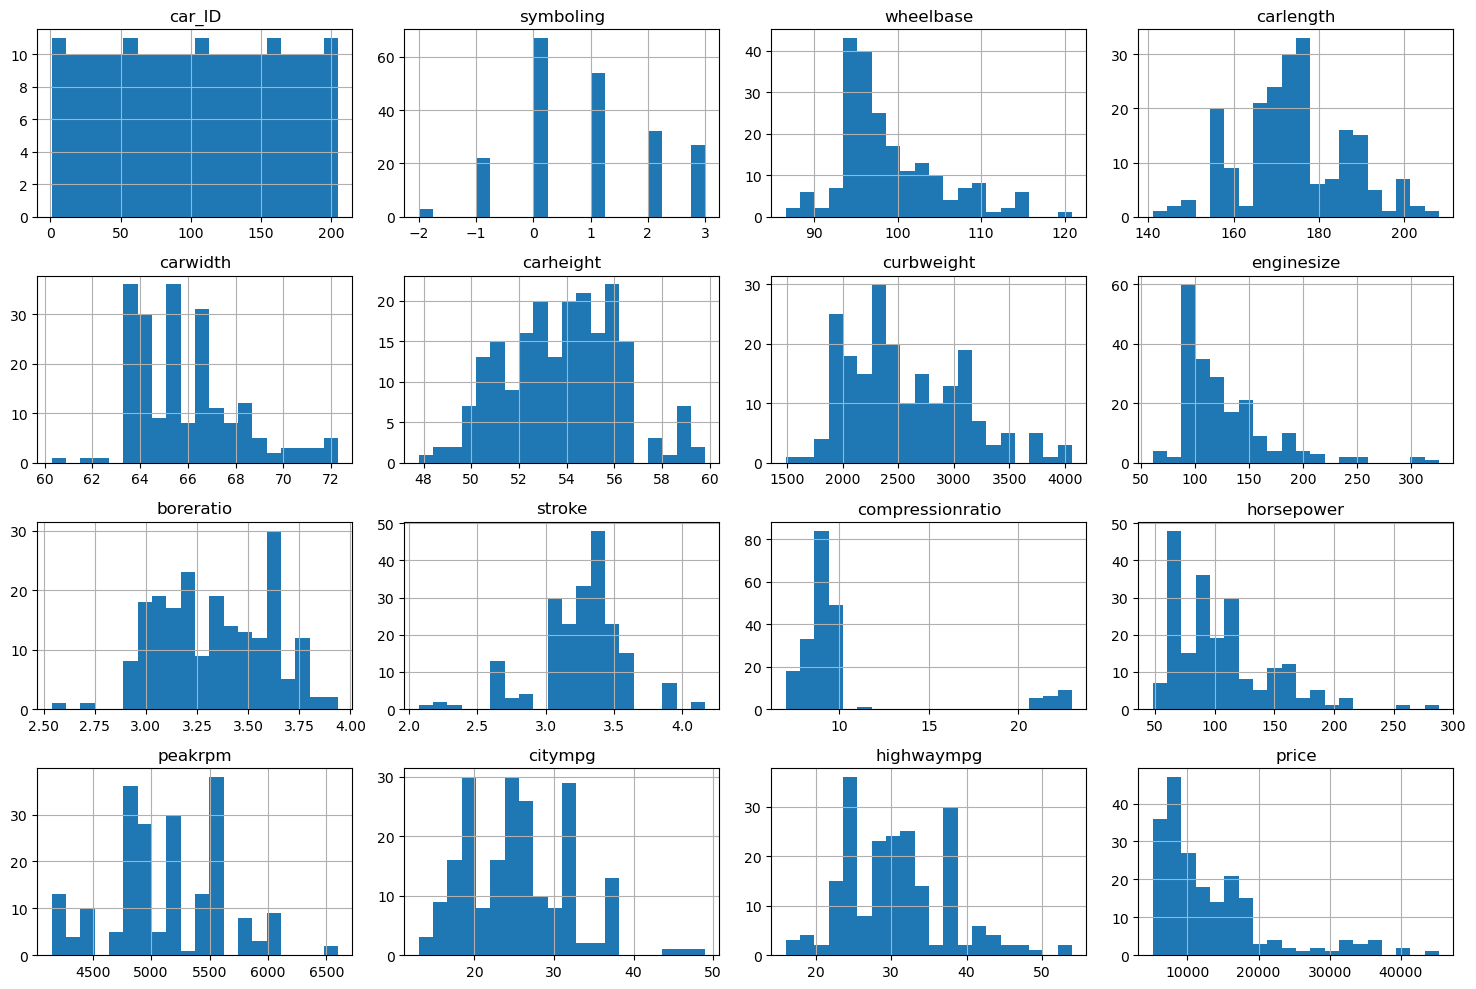

In [42]:
# Histograms for numeric features
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

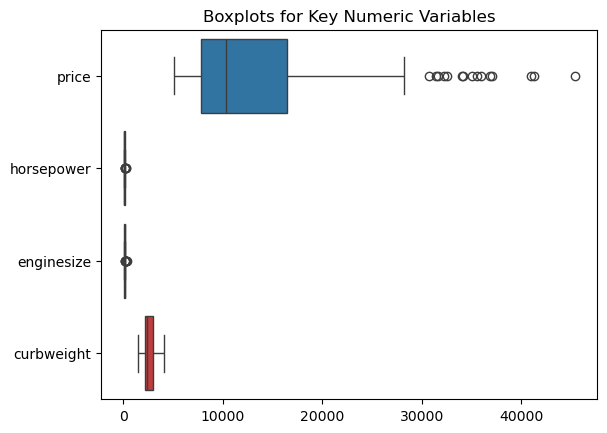

In [44]:
# Boxplots for price and numeric features
sns.boxplot(data=df[['price', 'horsepower', 'enginesize', 'curbweight']], orient='h')
plt.title("Boxplots for Key Numeric Variables")
plt.show()

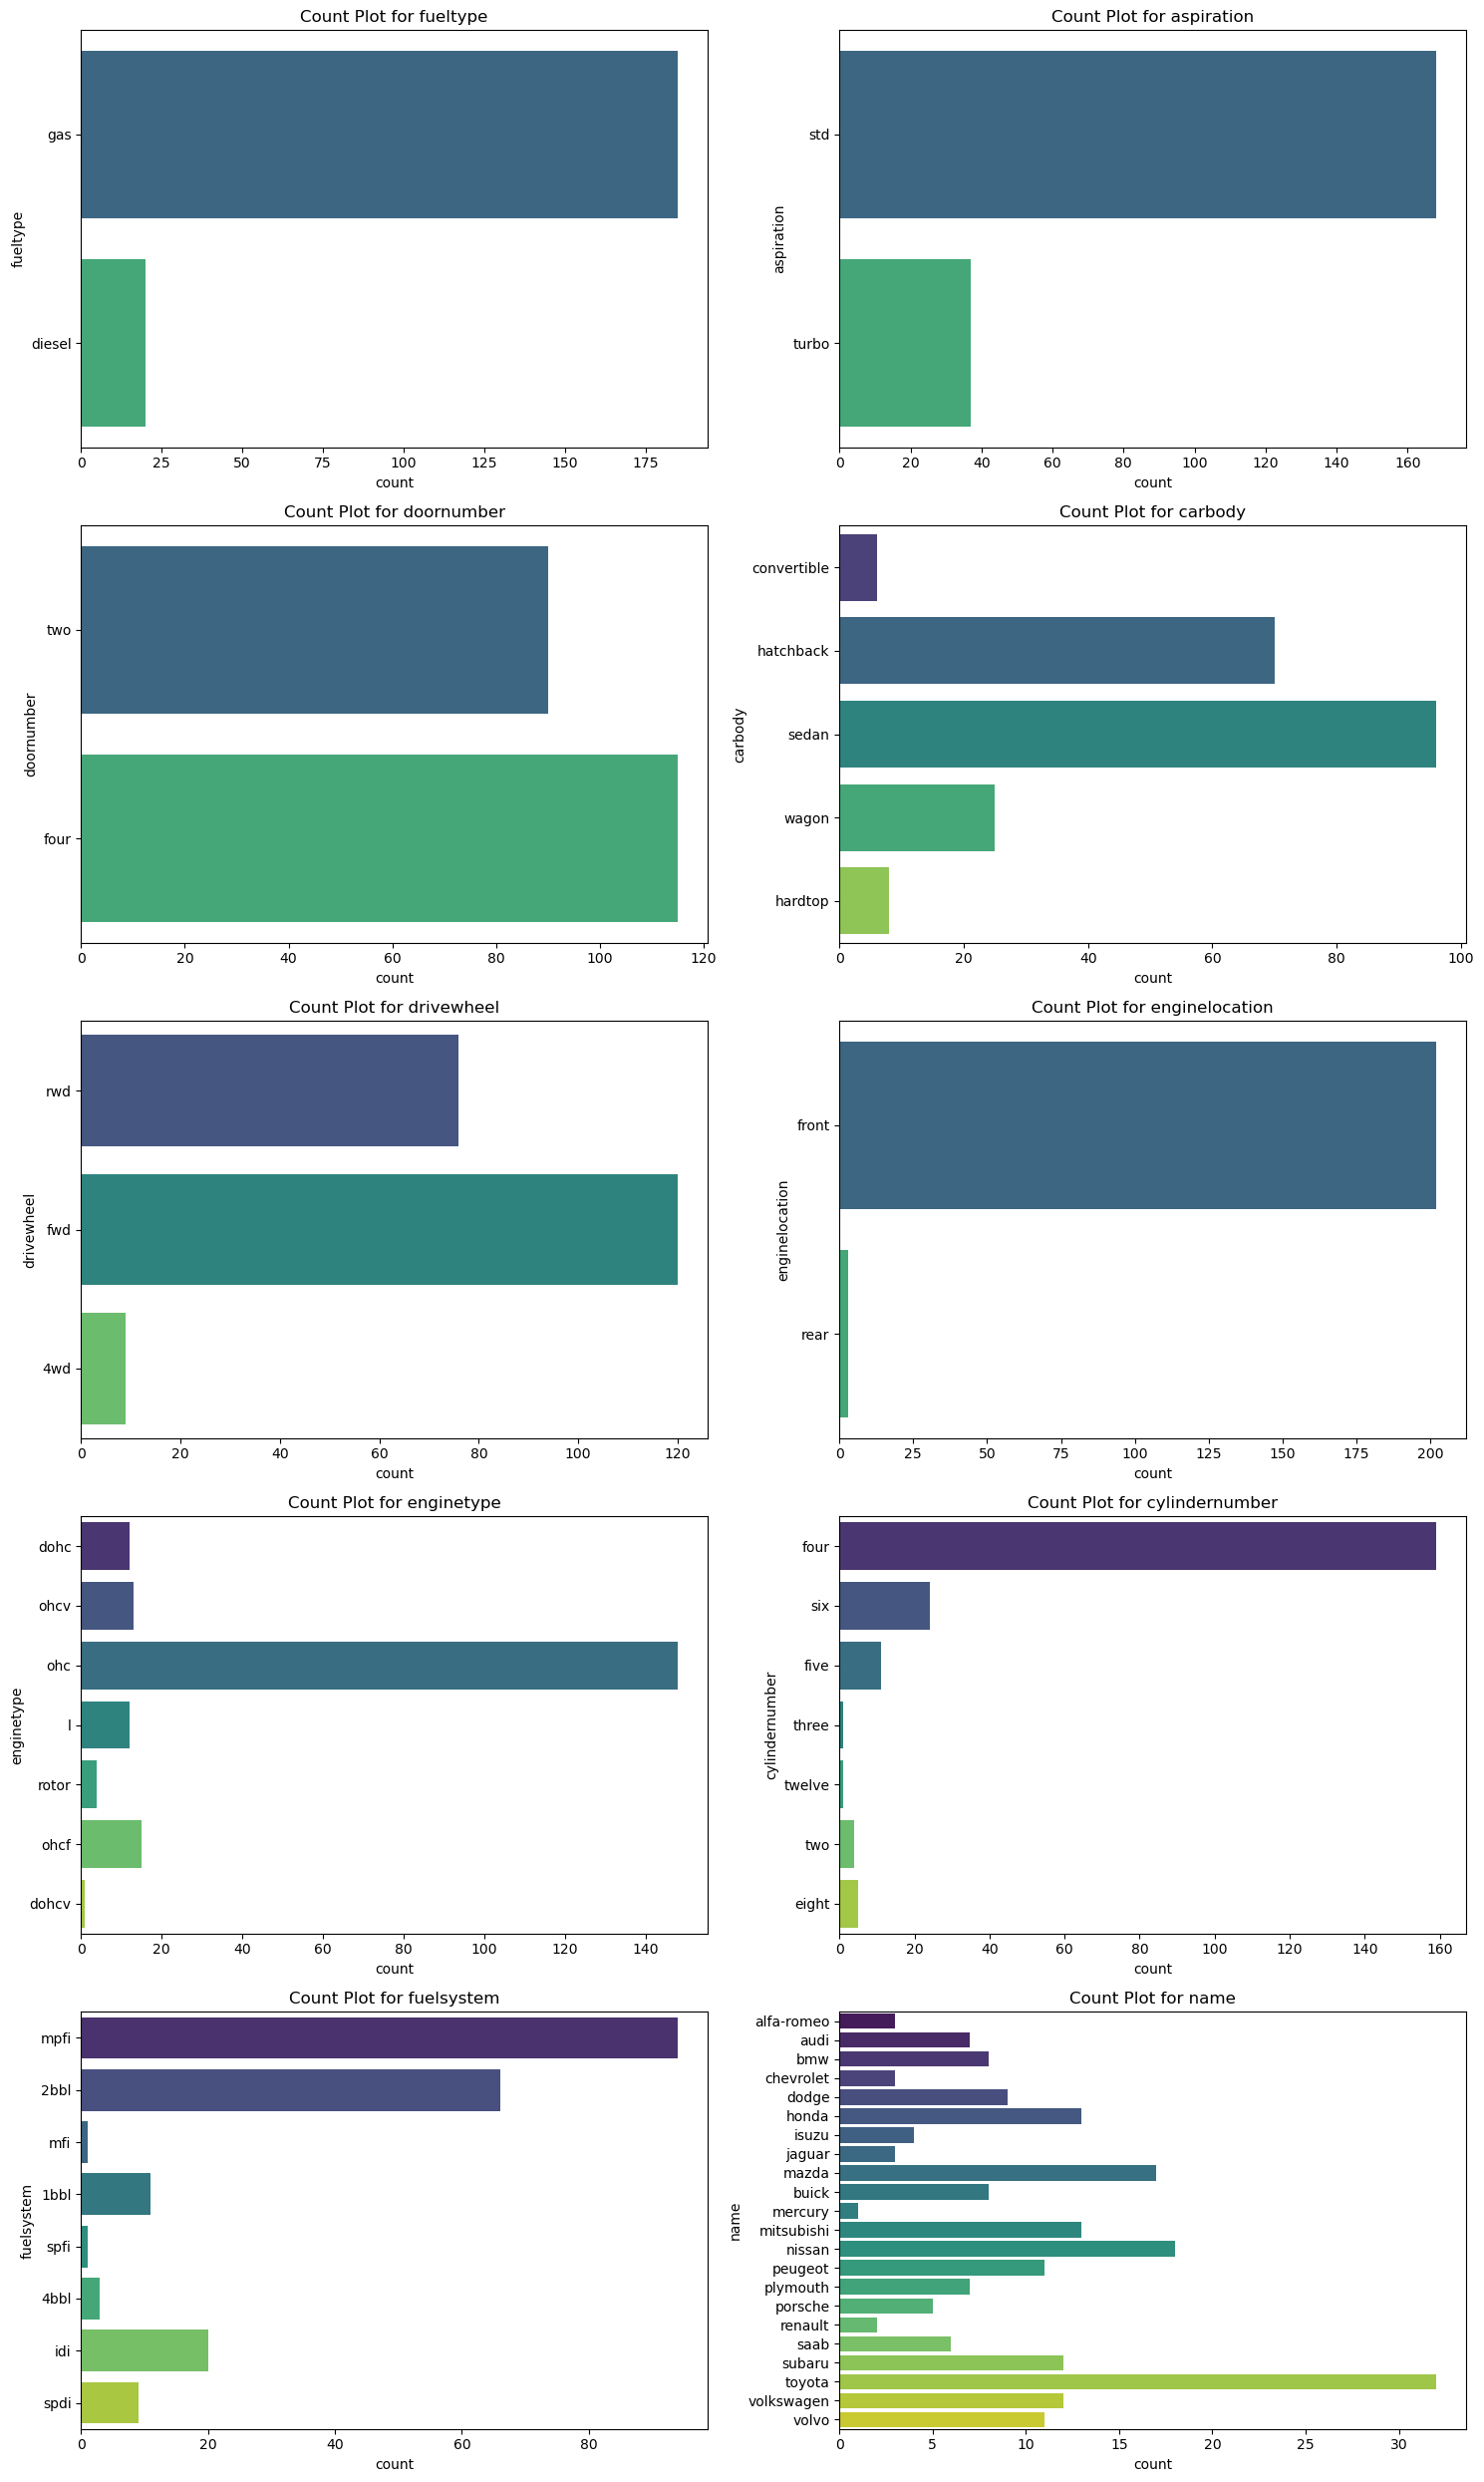

In [46]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for bar plots of categorical variables
categorical_cols = df.select_dtypes(include='object').columns
n_cols = 2  # Number of columns for the subplot grid
n_rows = (len(categorical_cols) + 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D axes array into 1D for easier indexing

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Count Plot for {col}")

# Remove unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>11. BIVARIATE ANALYSIS</b>
</div>

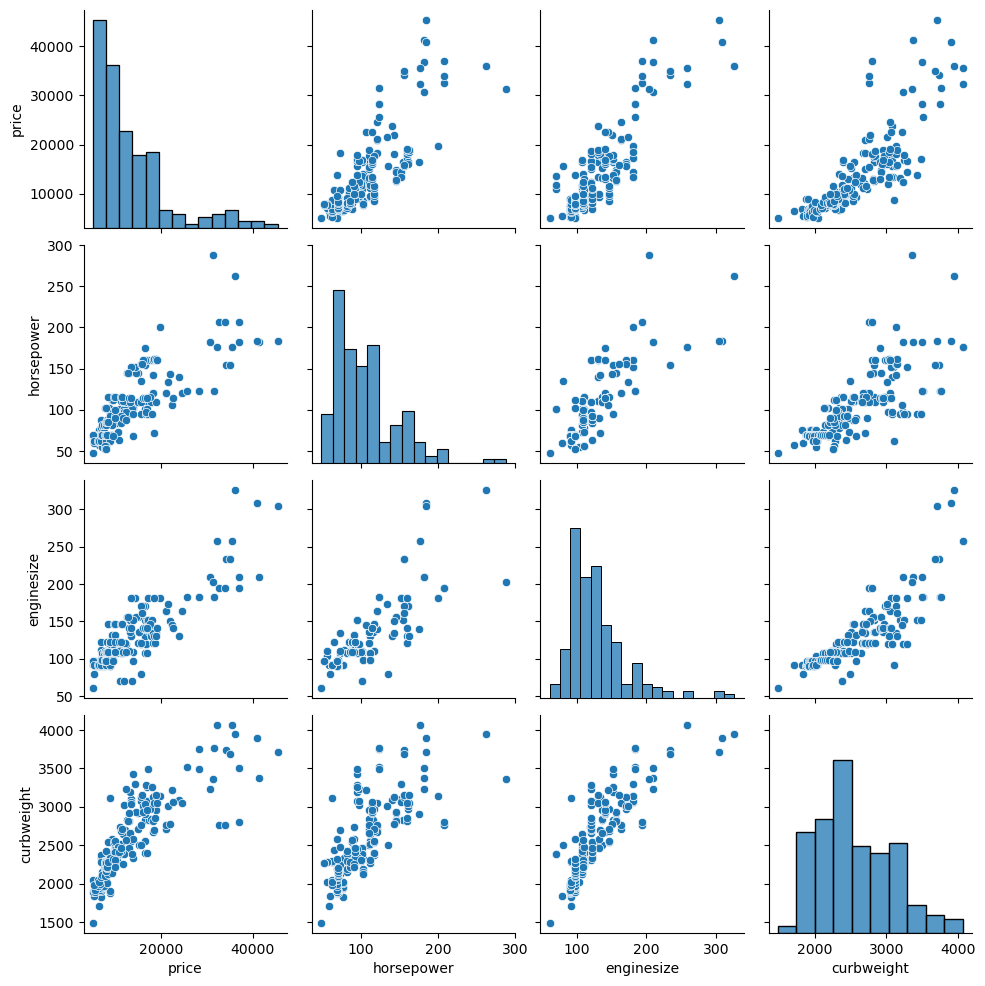

In [50]:
# 1. Scatter plots for numeric variables
sns.pairplot(df, vars=['price', 'horsepower', 'enginesize', 'curbweight'], kind='scatter')
plt.show()

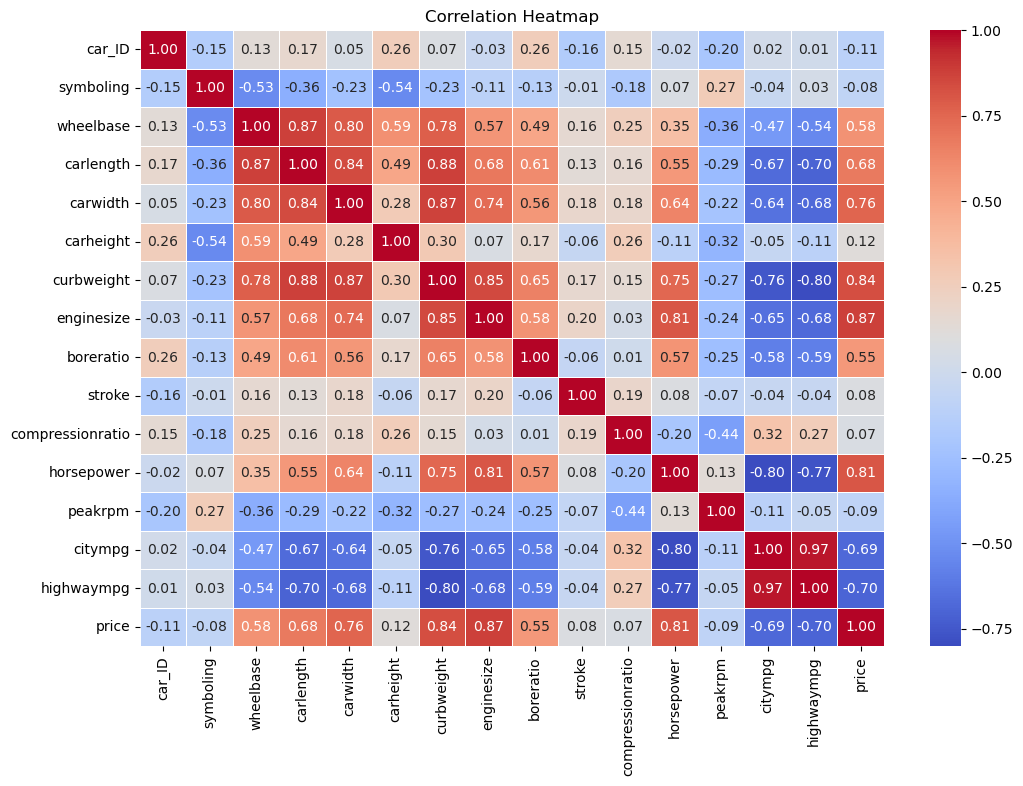

In [52]:
# 2. Correlation heatmap for numeric features

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

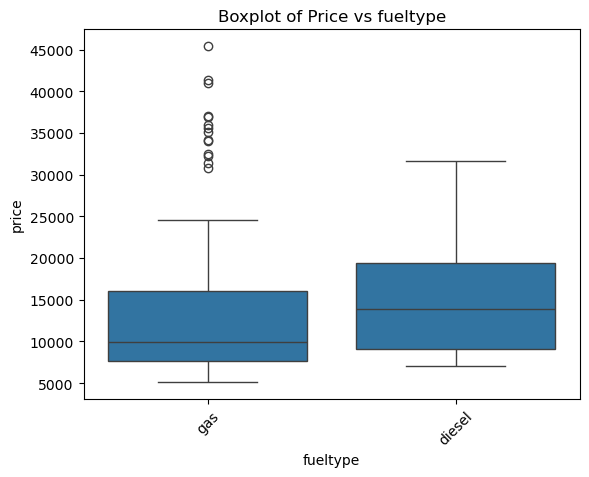

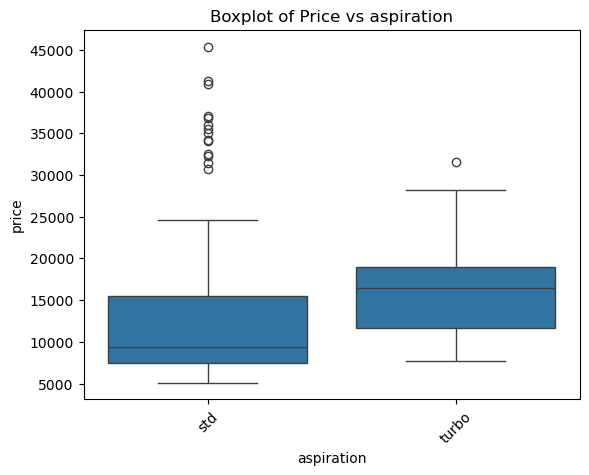

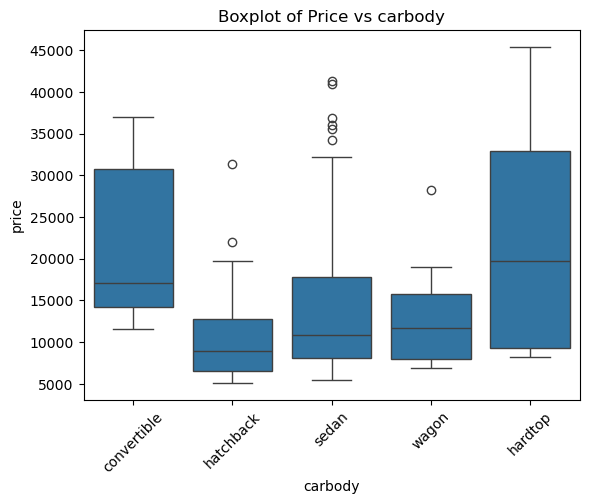

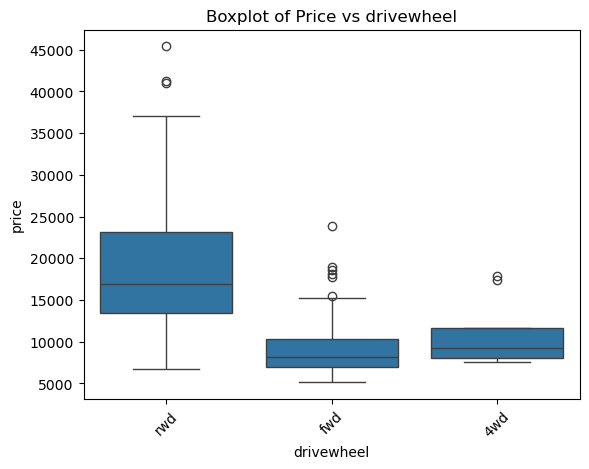

In [54]:
# 3. Boxplot of price against categorical variables
for col in ['fueltype', 'aspiration', 'carbody', 'drivewheel']:
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"Boxplot of Price vs {col}")
    plt.xticks(rotation=45)
    plt.show()

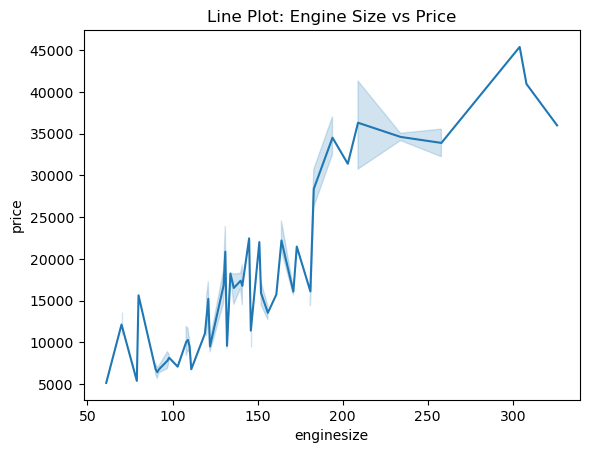

In [56]:
# 4. Line plot for engine size and price
sns.lineplot(data=df, x='enginesize', y='price')
plt.title("Line Plot: Engine Size vs Price")
plt.show()

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>12. MULTIVARIATE ANALYSIS</b>
</div>

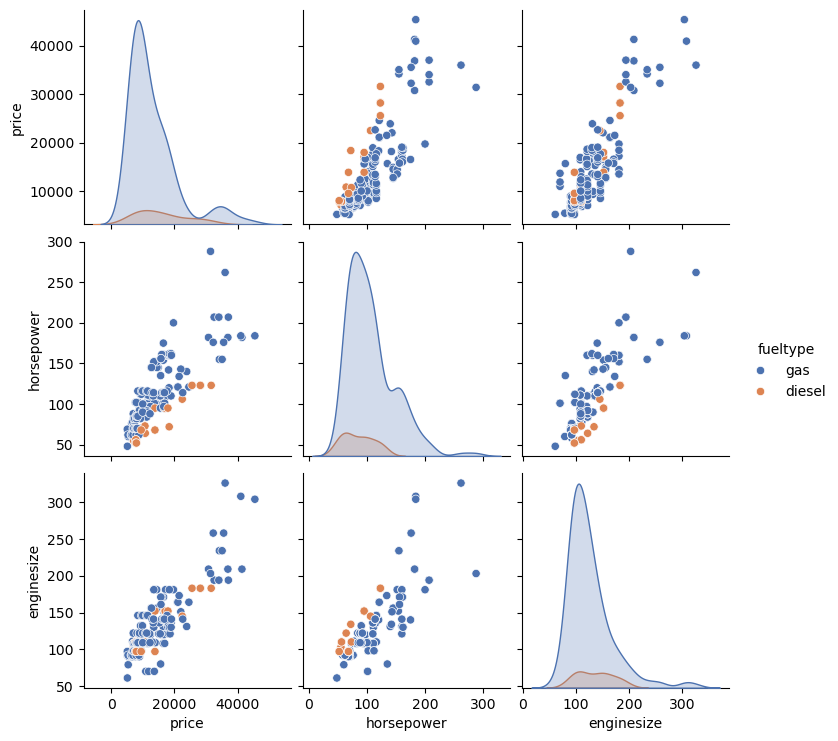

In [60]:
# 1. Pairplot including categorical hue
sns.pairplot(df, vars=['price', 'horsepower', 'enginesize'], hue='fueltype', palette='deep')
plt.show()

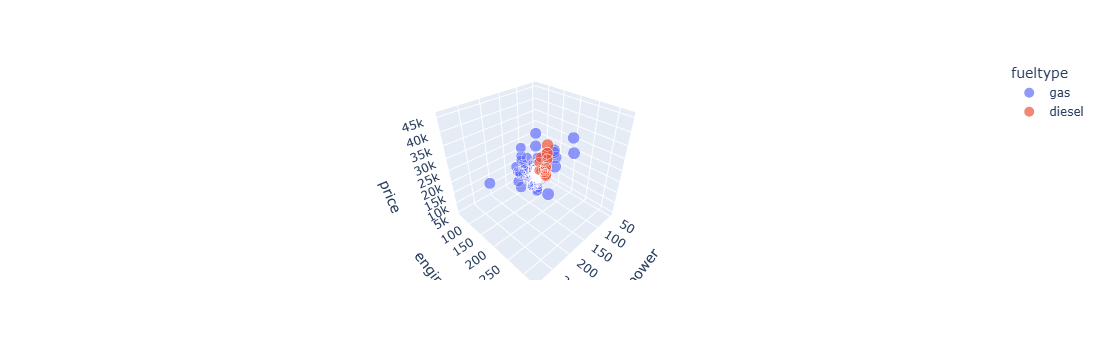

In [62]:
# 2. 3D Scatter plot (requires plotly)
import plotly.express as px
fig = px.scatter_3d(df, x='horsepower', y='enginesize', z='price', color='fueltype', size='curbweight')
fig.show()

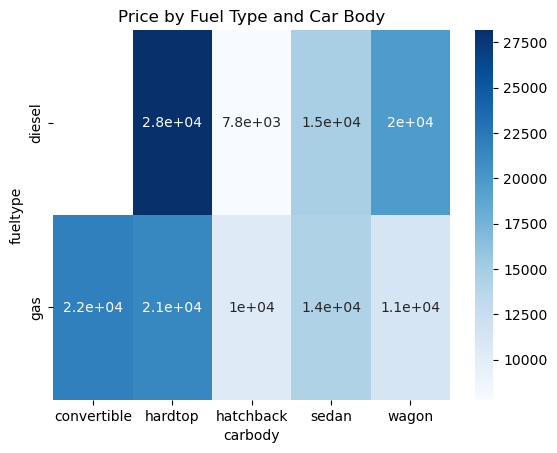

In [64]:
# 3. Heatmap with interactions
pivot_table = pd.pivot_table(df, values='price', index='fueltype', columns='carbody', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title("Price by Fuel Type and Car Body")
plt.show()

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>DATA CLEANING</b></u>
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>1. FEATURE ENCODING</b>
</div>

In [69]:
binary_cols = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
df[binary_cols] = df[binary_cols].apply(lambda x: LabelEncoder().fit_transform(x))

# Categorical columns: 'name', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'
categorical_cols = ['name', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']

# Using one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>2. HANDLING OUTLIERS</b>
</div>

In [72]:
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where z-score < 3

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>3. FEATURE SCALING</b>
</div>

In [75]:
scaler = StandardScaler()
scaled_columns = numeric_cols.drop('price')  # Exclude the target column ('price') from scaling
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [77]:
df

car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0   -1.705395   1.692758         1           0           1               0   
1   -1.688383   1.692758         1           0           1               0   
2   -1.671371   0.113432         1           0           1               0   
3   -1.654360   0.903095         1           0           0               0   
4   -1.637348   0.903095         1           0           0               0   
..        ...        ...       ...         ...         ...             ...   
199  1.679924  -1.465894         1           1           0               0   
200  1.696936  -1.465894         1           0           0               0   
201  1.713948  -1.465894         1           1           0               0   
202  1.730959  -1.465894         1           0           0               0   
204  1.764983  -1.465894         1           1           0               0   

     wheelbase  carlength  carwidth  carheight  ...  cylindernumber_three  \
0    -1.777805  -0.399899 -0.851313  -1.980334  ...                 False   
1    -1.777805  -0.399899 -0.851313  -1.980334  ...                 False   
2    -0.706407  -0.190325 -0.136763  -0.520622  ...                 False   
3     0.256036   0.281217  0.220512   0.249782  ...                 False   
4     0.183399   0.281217  0.322591   0.249782  ...                 False   
..         ...        ...       ...        ...  ...                   ...   
199   1.073204   1.346553  0.730906   1.547304  ...                 False   
200   1.944850   1.346553  1.598574   0.736353  ...                 False   
201   1.944850   1.346553  1.547535   0.736353  ...                 False   
202   1.944850   1.346553  1.598574   0.736353  ...                 False   
204   1.944850   1.346553  1.598574   0.736353  ...                 False   

     cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                    False               False            False   
1                    False               False            False   
2                    False               False            False   
3                    False               False            False   
4                    False               False            False   
..                     ...                 ...              ...   
199                  False               False            False   
200                  False               False            False   
201                  False               False            False   
202                  False               False            False   
204                  False               False            False   

     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0              False           False           False             True   
1              False           False           False             True   
2              False           False           False             True   
3              False           False           False             True   
4              False           False           False             True   
..               ...             ...             ...              ...   
199            False           False           False             True   
200            False           False           False             True   
201            False           False           False             True   
202            False           False           False             True   
204            False           False           False             True   

     fuelsystem_spdi  fuelsystem_spfi  
0              False            False  
1              False            False  
2              False            False  
3              False            False  
4              False            False  
..               ...              ...  
199            False            False  
200            False            False  
201            False            False  
202            False            False  
204            False   

In [65]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'name'],
      dtype='object')

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>4. SPLITTING THE DATA INTO TRAINING AND TESTING SET</b>
</div>

In [80]:
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# 9. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check processed dataset
print("Processed Dataset Shape:", df.shape)
print("Processed Dataset Preview:\n", df.head())


Processed Dataset Shape: (181, 66)
Processed Dataset Preview:
      car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0 -1.705395   1.692758         1           0           1               0   
1 -1.688383   1.692758         1           0           1               0   
2 -1.671371   0.113432         1           0           1               0   
3 -1.654360   0.903095         1           0           0               0   
4 -1.637348   0.903095         1           0           0               0   

   wheelbase  carlength  carwidth  carheight  ...  cylindernumber_three  \
0  -1.777805  -0.399899 -0.851313  -1.980334  ...                 False   
1  -1.777805  -0.399899 -0.851313  -1.980334  ...                 False   
2  -0.706407  -0.190325 -0.136763  -0.520622  ...                 False   
3   0.256036   0.281217  0.220512   0.249782  ...                 False   
4   0.183399   0.281217  0.322591   0.249782  ...                 False   

   cylindernumber_twelve  cyl

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>MODEL IMPLEMENTATION AND EVALUATION</b></u>
</div>

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[name] = {"R-squared": r2, "MSE": mse, "MAE": mae}
    print(f"{name} - R-squared: {r2:.3f}, MSE: {mse:.3f}, MAE: {mae:.3f}")
    print("-" * 50)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T  # Transpose for better readability
print("\nComparison of Model Performance:")
print(results_df)

# Sort the results by R-squared for better visualization
sorted_results = results_df.sort_values(by="R-squared", ascending=False)
print("\nSorted Results by R-squared:")
print(sorted_results)

Training and evaluating Linear Regression...
Linear Regression - R-squared: -0.597, MSE: 79979879.040, MAE: 4303.487
--------------------------------------------------
Training and evaluating Decision Tree Regressor...
Decision Tree Regressor - R-squared: 0.862, MSE: 6901322.654, MAE: 1709.306
--------------------------------------------------
Training and evaluating Random Forest Regressor...
Random Forest Regressor - R-squared: 0.930, MSE: 3493466.544, MAE: 1286.072
--------------------------------------------------
Training and evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor - R-squared: 0.930, MSE: 3489361.476, MAE: 1334.132
--------------------------------------------------
Training and evaluating Support Vector Regressor...
Support Vector Regressor - R-squared: -0.055, MSE: 52868726.512, MAE: 4870.108
--------------------------------------------------

Comparison of Model Performance:
                             R-squared           MSE          MAE
Linear R

<div style="text-align: left; font-size: 22px; color: white;">
    <p>
        
### 1. R-squared (Coefficient of Determination):

**Interpretation:**  
R-squared quantifies how well the model explains the variability in the target variable. A higher value, closer to 1, indicates a better fit.

**Ranking (Highest to Lowest):**
1. **Gradient Boosting Regressor**: 0.9303  
2. **Random Forest Regressor**: 0.9303  
3. **Decision Tree Regressor**: 0.8622  
4. **Support Vector Regressor**: -0.0554 (a negative value indicates a poor fit)  
5. **Linear Regression**: -0.5966 (a negative value suggests the model performs worse than predicting the mean of the target variable)

**Conclusion:**  
The **Gradient Boosting Regressor** exhibits the highest R-squared value, demonstrating the best ability to explain the variability in the data.

---

### 2. Mean Squared Error (MSE):

**Interpretation:**  
MSE represents the average squared difference between the predicted and actual values. Lower MSE values are preferred, indicating better model performance.

**Ranking (Lowest to Highest):**
1. **Gradient Boosting Regressor**: 3.4894 * 10⁶  
2. **Random Forest Regressor**: 3.4935 * 10⁶  
3. **Decision Tree Regressor**: 6.9013 * 10⁶  
4. **Support Vector Regressor**: 5.2869 * 10⁷  
5. **Linear Regression**: 7.9980 * 10⁷

**Conclusion:**  
The **Gradient Boosting Regressor** achieves the lowest MSE, signifying that it produces the smallest squared errors and is the most accurate in terms of prediction.

---

### 3. Mean Absolute Error (MAE):

**Interpretation:**  
MAE measures the average absolute difference between the predicted and actual values. Lower values indicate better accuracy, with fewer deviations from the true values.

**Ranking (Lowest to Highest):**
1. **Random Forest Regressor**: 1286.07  
2. **Gradient Boosting Regressor**: 1334.13  
3. **Decision Tree Regressor**: 1709.31  
4. **Linear Regression**: 4303.49  
5. **Support Vector Regressor**: 4870.11

**Conclusion:**  
The **Random Forest Regressor** yields the lowest MAE, demonstrating the closest alignment between its predictions and the actual values.

---

### Final Recommendation:

When considering both **R-squared** and **MSE**, the **Gradient Boosting Regressor** stands out as the best model overall. It effectively explains the variance in the data and produces the smallest squared errors.  

However, if minimizing absolute errors (MAE) is of paramount importance, the **Random Forest Regressor** slightly edges out Gradient Boosting. Despite this, the differences in performance between the two models are minimal. 

Given its balanced performance across multiple metrics, **Gradient Boosting Regressor** is recommended as the optimal model for predicting car prices.
</p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>FEATURE IMPORTANCE ANALYSIS</b></u>
</div>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation of price with each feature
correlation_with_price = df.corr()["price"].sort_values(ascending=False)
correlation_table = correlation_with_price.to_frame(name="Correlation with Price")

# Filter the table to display only positive correlation values
positive_correlation_table = correlation_table[correlation_table["Correlation with Price"] > 0]

# Display the filtered table
print("Features with Positive Correlation with Price:")
display(positive_correlation_table)

Features with Positive Correlation with Price:


Correlation with Price
price                              1.000000
enginesize                         0.830473
curbweight                         0.802365
horsepower                         0.792024
carwidth                           0.711771
drivewheel_rwd                     0.638593
carlength                          0.638258
boreratio                          0.536939
fuelsystem_mpfi                    0.509319
wheelbase                          0.499827
name_buick                         0.491968
cylindernumber_six                 0.484293
enginelocation                     0.423143
name_porsche                       0.420193
cylindernumber_five                0.342106
name_bmw                           0.338747
fuelsystem_idi                     0.305847
enginetype_ohcv                    0.280770
aspiration                         0.279749
compressionratio                   0.263098
carbody_hardtop                    0.188320
name_volvo                         0.181358
carheight                          0.175122
name_audi                          0.157468
carbody_sedan                      0.103060
enginetype_l                       0.094218
name_peugeot                       0.094218
name_saab                          0.067297
enginetype_ohcf                    0.052134
stroke                             0.051856
name_mercury                       0.043512
enginetype_rotor                   0.010037
cylindernumber_two                 0.010037
fuelsystem_mfi                     0.004357

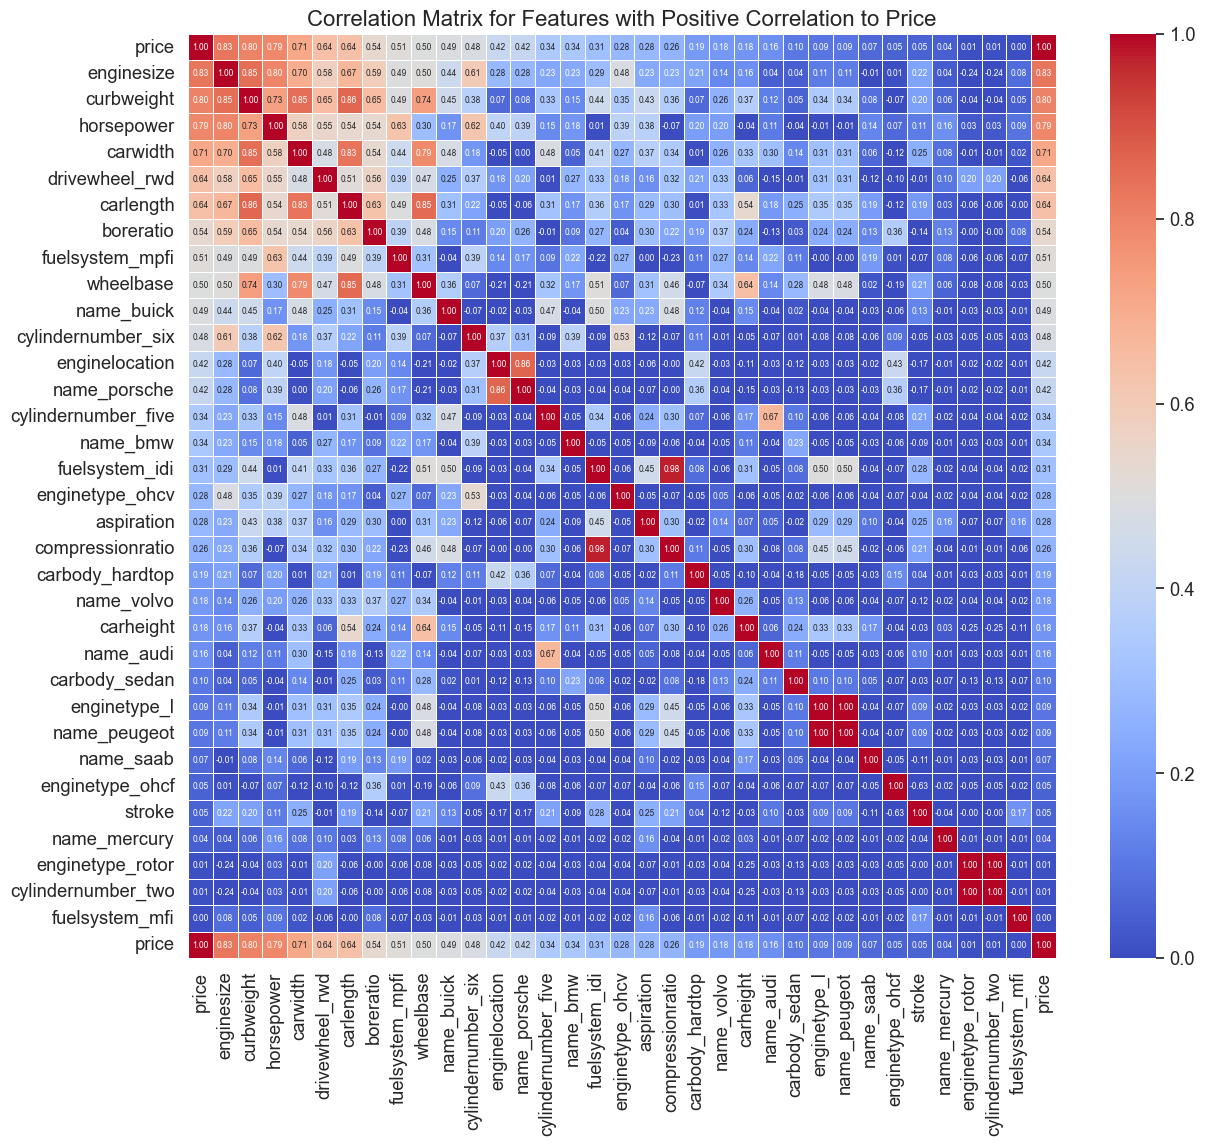

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the correlation table for positive correlation values
positive_correlations = correlation_table[correlation_table["Correlation with Price"] > 0]

# Extract the feature names with positive correlation
positive_features = positive_correlations.index.tolist()

# Create a subset of the dataframe with only positive correlation features and price
positive_correlation_matrix = df[positive_features + ["price"]].corr()

# Adjust the font scale and create the heatmap
sns.set(font_scale=1.2)  # Adjust font scale for better readability
plt.figure(figsize=(14, 12))  # Adjust the figure size for larger boxes
sns.heatmap(
    positive_correlation_matrix,
    annot=True,
    fmt=".2f",  # Format the annotations to 2 decimal places
    annot_kws={"size": 6},  # Adjust the size of annotation text
    cmap="coolwarm",
    linewidths=0.5,
    vmin=0,  # Minimum correlation value (only positive correlations are shown)
)
plt.title("Correlation Matrix for Features with Positive Correlation to Price", fontsize=16)
plt.show()

<div style="text-align: left; font-size: 22px; color: white;">
    <p>To identify the key features most strongly correlated with car price, we typically categorize correlation values based on the following thresholds:

- **Strong correlation**: Absolute correlation value ≥ 0.7
- **Moderate correlation**: Absolute correlation value between 0.5 and 0.7
- **Weak correlation**: Absolute correlation value < 0.5

Based on these criteria, the features exhibiting a **strong correlation** (correlation coefficient ≥ 0.7) with car price are as follows:

1. **Engine Size**: 0.8305
2. **Curb Weight**: 0.8024
3. **Horsepower**: 0.7920
4. **Car Width**: 0.7118

These features demonstrate the highest levels of correlation with car price and are likely to be significant predictors in the model.
</p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>HYPER PARAMETER TUNING </b></u>
</div>

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# Linear Regression has no hyperparameters to tune in this case
param_grid_lr = {}

# Initialize models
models = {
    "Random Forest": (RandomForestRegressor(random_state=42), param_grid_rf),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), param_grid_gb),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), param_grid_dt),
    "Support Vector Regressor": (SVR(), param_grid_svr),
    "Linear Regression": (LinearRegression(), param_grid_lr)
}

# Perform GridSearchCV and evaluate performance
best_estimators = {}
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    
    if param_grid:  # Skip GridSearchCV for models with no hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)  # Train model directly for Linear Regression
        best_model = model
    
    # Store the best estimator
    best_estimators[model_name] = best_model
    
    # Evaluate performance on the test set
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} Performance after Hyperparameter Tuning:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("-" * 50)

Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Performance after Hyperparameter Tuning:
R-squared: 0.9282
Mean Squared Error: 3595887.4571
Mean Absolute Error: 1295.1399
--------------------------------------------------
Performing GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Performance after Hyperparameter Tuning:
R-squared: 0.9094
Mean Squared Error: 4538433.5470
Mean Absolute Error: 1451.8173
--------------------------------------------------
Performing GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Performance after Hyperparameter Tuning:
R-squared: 0.8518
Mean Squared Error: 7426333.2763
Mean Absolute Error: 1689.4226
------

<div style="text-align: left; font-size: 26px; color: purple;">
    <p><b><u>Model Performance Evaluation: Tuning Results</u></b></p>
</div>
<div style="text-align: LEFT; font-size: 22px; color: white;">
1. Gradient Boosting Regressor

**Before Tuning:**
- **R-squared**: 0.9303
- **MSE**: 3.489361 * 10⁶
- **MAE**: 1334.1320

**After Tuning:**
- **R-squared**: 0.9094 (↓)
- **MSE**: 4.538433 * 10⁶ (↑)
- **MAE**: 1451.8173 (↑)

**Observation**: The model performance **decreased** after tuning. There was a slight drop in the R-squared value, indicating a marginally worse fit. Additionally, both MSE and MAE increased, suggesting that the tuning led to a deterioration in prediction accuracy, potentially due to overfitting or suboptimal hyperparameters.

---

**2. Random Forest Regressor**

**Before Tuning:**
- **R-squared**: 0.9303
- **MSE**: 3.493467 * 10⁶
- **MAE**: 1286.0717

**After Tuning:**
- **R-squared**: 0.9282 (↓)
- **MSE**: 3.595887 * 10⁶ (↑)
- **MAE**: 1295.1399 (↑)

**Observation**: The performance of the Random Forest Regressor **slightly decreased** after tuning. Although the changes are minor, both the R-squared and MAE showed a slight decline, while MSE increased. These results indicate that the model's ability to predict accurately marginally worsened, possibly due to the model becoming slightly overfitted during tuning.

---

**3. Decision Tree Regressor**

**Before Tuning:**
- **R-squared**: 0.8622
- **MSE**: 6.901323 * 10⁶
- **MAE**: 1709.3063

**After Tuning:**
- **R-squared**: 0.8518 (↓)
- **MSE**: 7.426333 * 10⁶ (↑)
- **MAE**: 1689.4226 (↓)

**Observation**: The Decision Tree Regressor also exhibited **a slight decrease in performance** post-tuning. While the R-squared dropped, the MSE increased, and MAE showed a small improvement. This indicates that tuning had a minor effect on the model, with some improvement in terms of error measurement, though the overall model fit worsened slightly.

---

**4. Support Vector Regressor (SVR)**

**Before Tuning:**
- **R-squared**: -0.0554
- **MSE**: 5.286873 * 10⁷
- **MAE**: 4870.1076

**After Tuning:**
- **R-squared**: 0.6652 (↑)
- **MSE**: 1.677206 * 10⁷ (↓)
- **MAE**: 2135.2316 (↓)

**Observation**: The **Support Vector Regressor showed significant improvement** after tuning. The R-squared increased substantially, turning positive and rising dramatically, indicating a much better fit to the data. Additionally, both MSE and MAE decreased considerably, confirming that the tuning enhanced the model's predictive performance significantly, making it much more competitive.

---

**5. Linear Regression**

**Before Tuning:**
- **R-squared**: -0.5966
- **MSE**: 7.997988 * 10⁷
- **MAE**: 4303.4873

**After Tuning:**
- **R-squared**: -0.5966 (no change)
- **MSE**: 7.997988 * 10⁷ (no change)
- **MAE**: 4303.4873 (no change)

**Observation**: The **Linear Regression model did not experience any change** post-tuning, as hyperparameter tuning is generally not applicable to this model. The model's performance remained unchanged, with no improvement or degradation observed.

---
<div style="text-align: left; font-size: 26px; color: purple;">
    <p><b><u>Conclusion:</u></b></p>
</div>
<div style="text-align: left; font-size: 20px; color: white;">
<p>The Support Vector Regressor (SVR) demonstrated the most substantial improvement after tuning. The model's R-squared increased significantly, turning positive, while both MSE and MAE showed marked reductions, making SVR a much more viable option for predicting car prices after tuning.

In contrast, the performance of both **Gradient Boosting** and **Random Forest** models slightly declined after tuning. This could indicate that the hyperparameter tuning resulted in a slight overfitting of the model or that the parameter combinations were not optimal.

The **Decision Tree Regressor** also showed a marginal decrease in performance, although MAE improved slightly, suggesting that the model's error metrics were somewhat optimized post-tuning.

Lastly, **Linear Regression** did not exhibit any change in performance, as no tuning was applied to this model.

In summary, **SVR** emerged as the most improved model, although it still did not outperform Gradient Boosting or Random Forest in terms of R-squared. Nonetheless, the significant improvement in its performance after tuning makes it a more competitive model in the regression task for car prices.</p>
</div>